# Деревья
```
1. построить график зависимости accuracy от количества деревьев Random Forest
2. построить график зависимости accuracy от глубины дерева
```

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [41]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

```
This dataset contains 13 different parameters for wine with 178 samples. 
The purpose of this wine dataset in scikit-learn is to predict the best wine class among 3 classes.
```
| Name | Facts |
|------|--------|
| Classes | 3 |
| Features total | 13 |
| Total samples | 178 |
| No. of samples per class | [59,71,48] |
| Features type | Positive and real |

In [42]:
def forest_score(max_depth, n_estimators = 100):
    """
      This function trains a random forest classifier on the provided training set and
      returns the accuracy score on the provided testing set.
      
      Parameters:
        max_depth: integer value representing the maximum depth of the decision trees
        n_estimators: integer value representing the number of decision trees in the forest
      Returns: 
        the accuracy score of the random forest classifier on the testing set
    """
    rndForestClf = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators, random_state=0)
    rndForestClf.fit(X_train, y_train)
    return rndForestClf.score(X_test, y_test)

In [43]:
y_axis_for_depth = []
y_axis_for_estimator = []

depths_range = [i for i in range(1, 30)]
estimators_range = [i for i in range(1,100)]

for max_depth in depths_range:
    y_axis_for_depth.append(forest_score(max_depth))

for n_estimators in estimators_range:
    y_axis_for_estimator.append(forest_score(max_depth, n_estimators))

### Графики

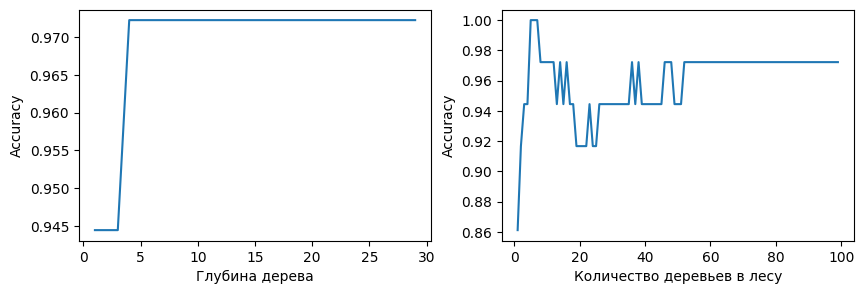

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax[0].plot(depths_range, y_axis_for_depth)
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Глубина дерева")

ax[1].plot(estimators_range, y_axis_for_estimator)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Количество деревьев в лесу")

plt.show()